<a href="https://colab.research.google.com/github/saiachanta21/Disease-Diagnosis-with-Wrist-Pulse-Signal-using-Machine-Learning-Vaatha-Pittha-Kapha/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### #Authors: Achanta Sai Krishna,Kuralanbu,Vimal Dharshan, Aathithya
### #Objective:Data Pre-processing
### #Input: Dataset
### #Output:Comparison of machine learning classifiers



In [ ]:
import warnings
warnings.filterwarnings('ignore')

Import required libraries

In [ ]:
# processes the raw data into a data frame.
import pandas as pd
# For working with arrays and matrices
import numpy as np
# For generating visualizations
import seaborn as sn
# For generating visualizations
import matplotlib.pyplot as plt

Reading Dataset

In [ ]:
df = pd.read_csv(r'/content/Dataset.csv')
#df = pd.read_csv(r'/content/Datasetsai_reduced.csv')
df

,acidity,indigestion,headache,blurred_and_distorted_vision,excessive_hunger,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,depression,...,gnawing,upper_abdomain_pain,fullness_feeling,hiccups,abdominal_bloating,heartburn,belching,burning_ache,type of dosha,prognosis
0,1,1,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,Kapha,Migraine
1,0,1,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,Kapha,Migraine
2,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,Kapha,Migraine
3,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,Kapha,Migraine
4,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,Kapha,Migraine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,Pittha,Gastritis
1067,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,Pittha,Gastritis
1068,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,Pittha,Gastritis
1069,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,Pittha,Gastritis


In [ ]:
unique_dosha_types = df['type of dosha'].unique()
unique_prognosis_types = df['prognosis'].unique()

print("Types of Dosha:", unique_dosha_types)
print("Prognosis:", unique_prognosis_types)


Types of Dosha: ['Kapha' 'Vaatha' 'Pittha']
Prognosis: ['Migraine' 'Arthritis' 'Diarrhea' 'Gastritis']


In [ ]:
df.shape #size of dataset

(1071, 33)

Checking for Null values


In [ ]:
#df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1071, 33)

In [ ]:
df.isnull().sum()

acidity                         0
indigestion                     0
headache                        0
blurred_and_distorted_vision    0
excessive_hunger                0
muscle_weakness                 0
stiff_neck                      0
swelling_joints                 0
movement_stiffness              0
depression                      0
irritability                    0
visual_disturbances             0
painful_walking                 0
abdominal_pain                  0
nausea                          0
vomiting                        0
blood_in_mucus                  0
Fatigue                         0
Fever                           0
Dehydration                     0
loss_of_appetite                0
cramping                        0
blood_in_stool                  0
gnawing                         0
upper_abdomain_pain             0
fullness_feeling                0
hiccups                         0
abdominal_bloating              0
heartburn                       0
belching      

In [ ]:
df.isnull().values.any()

False

### #Statistical measure for dataset

In [ ]:
df.describe()

,acidity,indigestion,headache,blurred_and_distorted_vision,excessive_hunger,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,depression,...,cramping,blood_in_stool,gnawing,upper_abdomain_pain,fullness_feeling,hiccups,abdominal_bloating,heartburn,belching,burning_ache
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,...,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.00000,1071.000000,1071.000000,1071.000000
mean,0.297852,0.347339,0.335201,0.197012,0.178338,0.288515,0.380019,0.210084,0.232493,0.212885,...,0.175537,0.160598,0.060691,0.091503,0.109244,0.117647,0.09057,0.060691,0.043884,0.074697
std,0.457528,0.476347,0.472281,0.397927,0.382976,0.453284,0.485618,0.407558,0.422619,0.409538,...,0.380603,0.367331,0.238874,0.288458,0.312090,0.322340,0.28713,0.238874,0.204933,0.263024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


Categorical Data

In [ ]:
df['type of dosha']=df['type of dosha'].replace({'Kapha':1,"Vaatha":2,"Pittha":3}) #is used to replace strings in the types of dosha with numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df.prognosis=encoder.fit_transform(df.prognosis)

In [ ]:
df.head()

,acidity,indigestion,headache,blurred_and_distorted_vision,excessive_hunger,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,depression,...,gnawing,upper_abdomain_pain,fullness_feeling,hiccups,abdominal_bloating,heartburn,belching,burning_ache,type of dosha,prognosis
0,1,1,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,3
1,0,1,1,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,3
2,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3
3,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,3


# Correlation

Used to show linear association between each feature

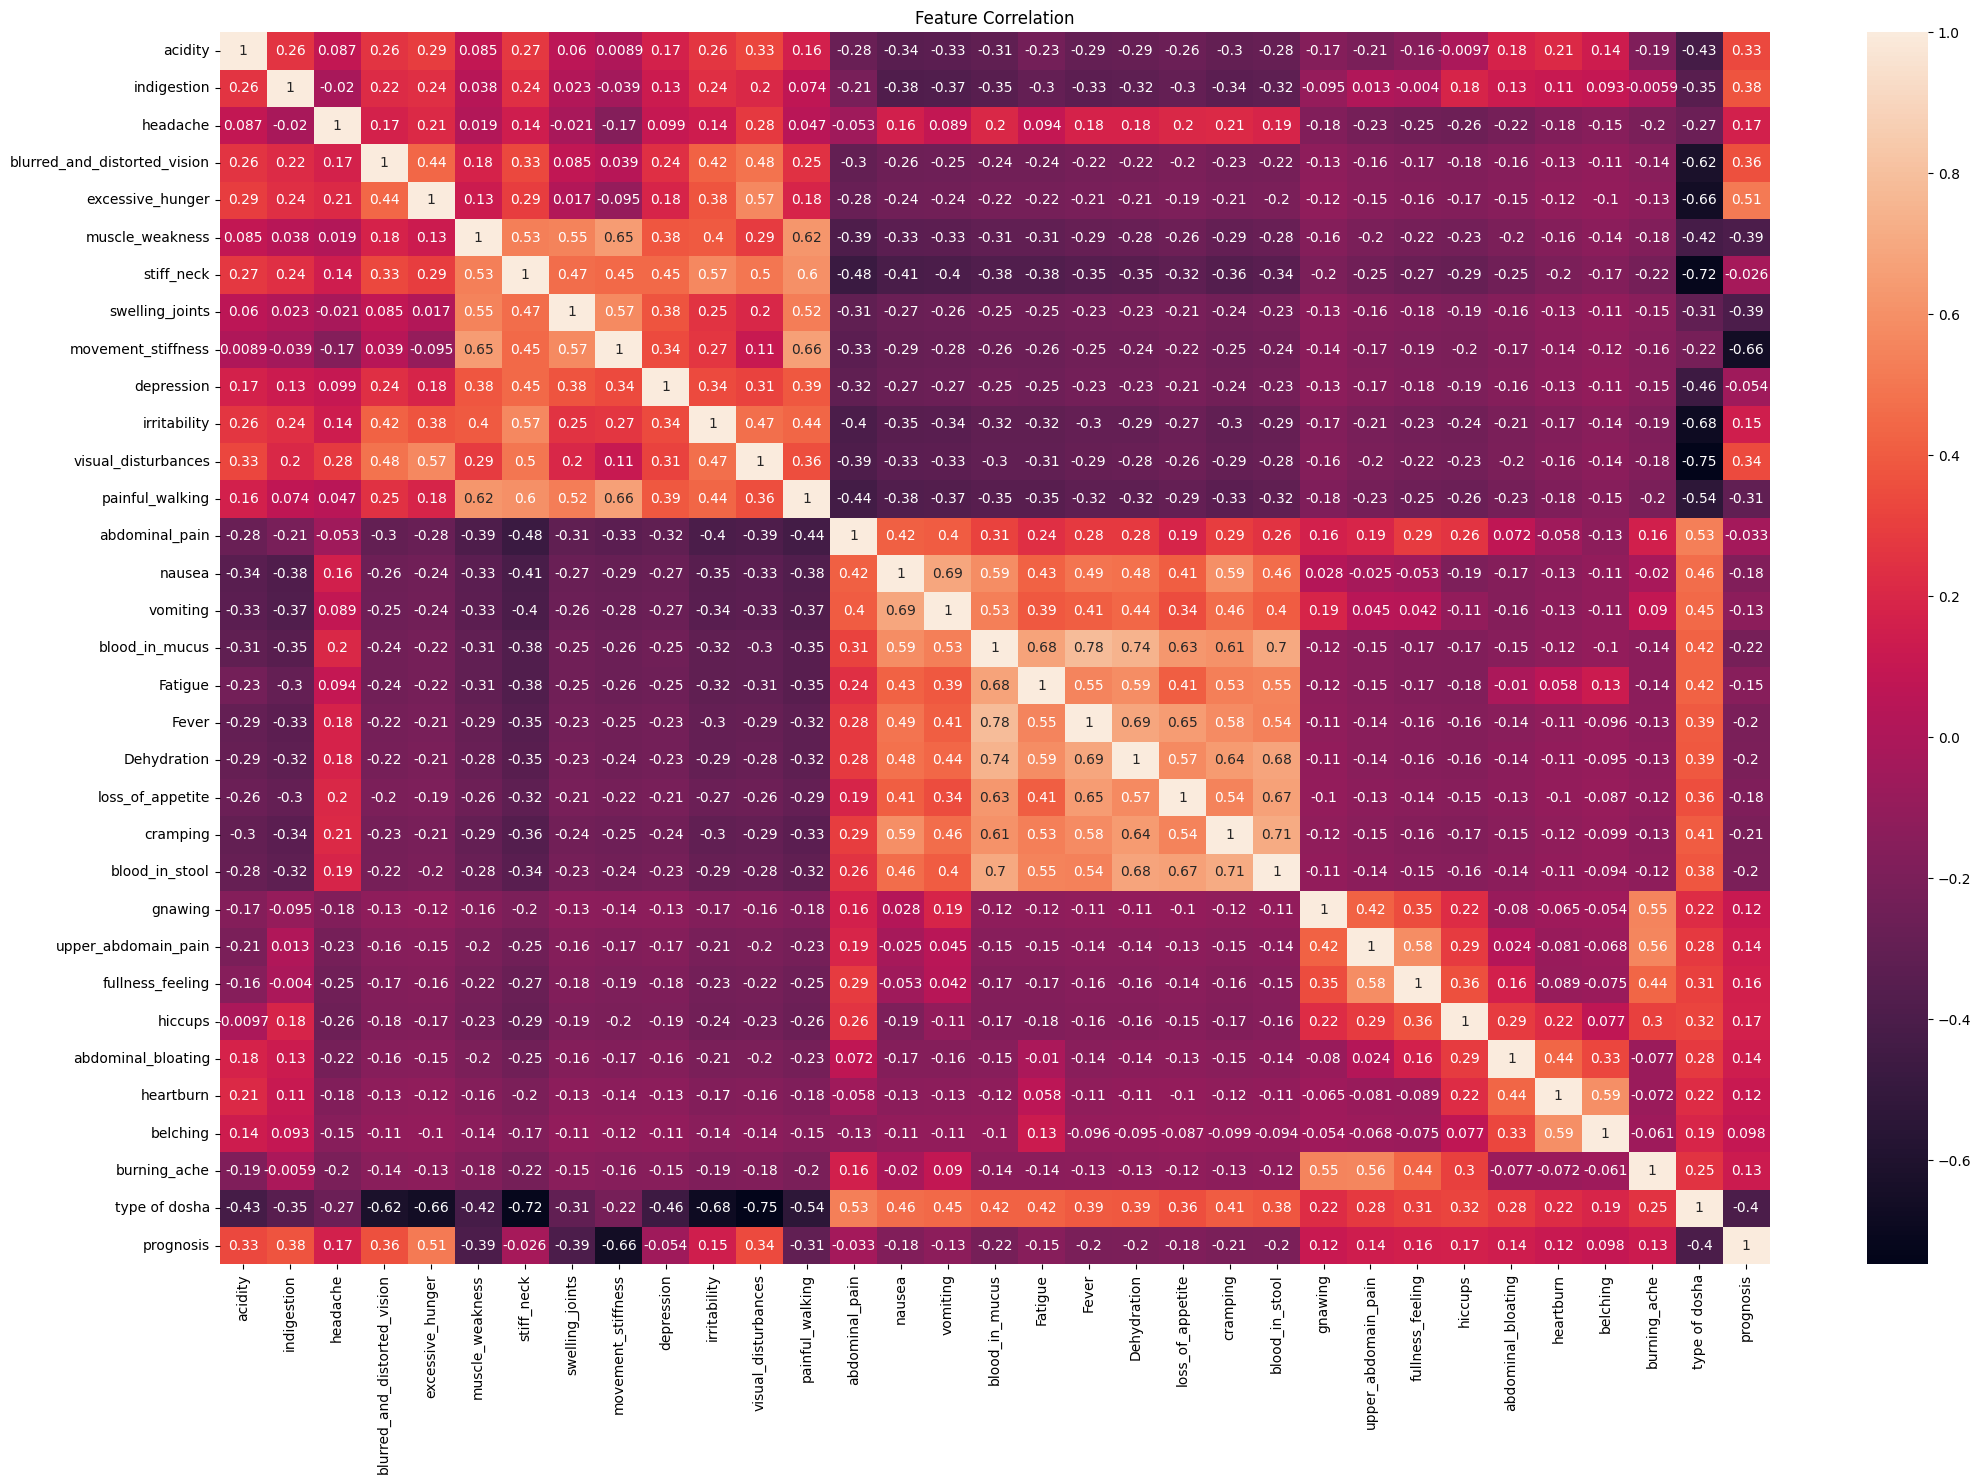

In [ ]:
plt.figure(figsize=(25,16))
sn.heatmap(df.corr(), annot = True) #annot true is used to display value in correlation
plt.title("Feature Correlation")
plt.show()

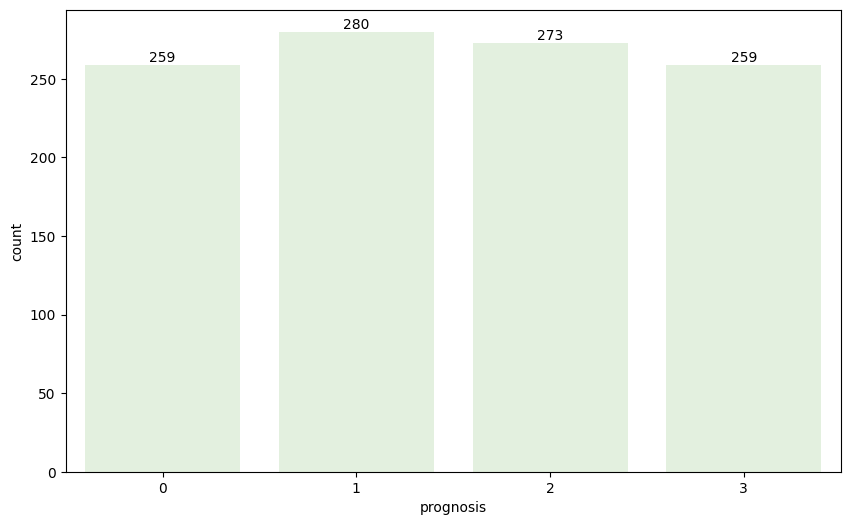

In [ ]:
plt.figure(figsize=(10, 6), dpi=100)

color_palette = sn.color_palette("Greens")
sn.set_palette(color_palette)

# Create the countplot
ax = sn.countplot(x="prognosis", data=df)

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.show()


### Converting the dataframe into a numpy array

### Splitting features of the dataset

### Splitting label of the dataset

In [ ]:
# Extract all rows and the first 31 columns of the NumPy array 'dataset'
# This creates a new array 'X' which contains all features of the dataset
X=df.iloc[:,:-1].values

# Print the array 'X' and its shape
# The 'shape' attribute returns the dimensions of the array as a tuple
# In this case, the shape represents the number of rows and columns in the 'X' array
print(X,X.shape)

[[1 1 0 ... 0 0 1]
 [0 1 1 ... 0 0 1]
 [1 0 1 ... 0 0 1]
 ...
 [0 1 0 ... 1 0 3]
 [0 1 0 ... 1 0 3]
 [0 1 0 ... 0 0 3]] (1071, 32)


In [ ]:
# Extract all rows of the last column of the NumPy array 'dataset'
# This creates a new array 'y' which contains the target variable

y=df.iloc[:,-1].values
# Print the array 'y' and its shape
# The 'shape' attribute returns the dimensions of the array as a tuple
# In this case, the shape represents the number of rows and columns in the 'y' array
print(y,y.shape)

[3 3 3 ... 2 2 2] (1071,)


### Splitting features and label as training and testing data

In [ ]:
# For splitting data into training and testing sets, and for cross-validation
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

# Print the training and testing sets along with their shapes
# The 'shape' attribute returns the dimensions of the array as a tuple
# In this case, the shape represents the number of rows and columns in each array
print("train data :", X_train, X_train.shape)
print("\ntest data :", X_test, X_test.shape)
print("\ntrain target :", y_train, y_train.shape)
print("\ntest target :", y_test, y_test.shape)

train data : [[1 1 1 ... 0 0 1]
 [0 0 1 ... 0 0 3]
 [0 1 1 ... 0 0 1]
 ...
 [0 0 0 ... 0 1 3]
 [0 0 0 ... 0 0 3]
 [0 0 1 ... 0 0 3]] (856, 32)

test data : [[0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 2]
 [0 0 1 ... 0 0 3]
 ...
 [0 0 1 ... 0 0 3]
 [0 1 0 ... 0 0 2]
 [1 0 1 ... 0 0 1]] (215, 32)

train target : [3 1 3 2 2 2 1 2 0 0 0 2 2 2 1 1 2 3 0 1 1 1 2 0 3 0 3 2 1 1 2 3 0 2 1 1 1
 0 0 1 1 3 2 1 3 1 3 0 1 0 0 2 2 3 0 1 1 3 1 2 1 2 3 1 3 2 3 3 2 0 0 2 0 3
 0 2 2 1 2 2 1 1 3 3 3 1 3 0 0 3 1 2 1 1 2 0 3 0 2 3 2 1 2 0 3 2 3 0 2 0 0
 2 2 3 3 2 0 1 1 0 0 0 3 1 0 0 0 2 2 3 2 0 3 3 1 3 1 0 2 2 1 3 1 2 1 3 3 3
 3 0 0 3 0 3 2 0 0 2 1 2 2 3 3 1 0 2 0 0 0 0 3 3 3 0 2 3 0 3 3 0 0 2 1 2 1
 0 3 2 3 0 2 3 1 0 2 0 1 0 3 3 3 0 3 3 3 1 3 1 0 3 0 3 2 1 0 0 2 2 0 2 3 2
 3 0 0 3 2 2 0 0 3 1 3 3 2 3 0 2 2 0 3 2 1 0 0 3 0 0 2 1 2 1 1 3 2 3 1 1 2
 3 3 1 3 3 3 1 0 2 1 1 3 1 0 1 1 1 3 2 0 1 1 0 2 3 1 3 3 3 3 3 1 2 2 0 1 2
 2 1 3 2 3 0 3 1 1 3 2 0 3 1 1 0 1 3 0 0 2 2 1 1 3 1 1 2 3 1 3 0 0 3 0 1 3
 1 2 2 3 1 0 0 0 3 0 1 

### **Model Buliding**

In [ ]:
pip install mord

In [ ]:
from mord import LogisticIT
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Training the model
model = LogisticIT()
model.fit(X_train, y_train)

# Making predictions
y_predict = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy of logistic regression:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_predict))


Accuracy of logistic regression: 0.9302325581395349
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        58
           1       0.87      1.00      0.93        60
           2       0.90      0.98      0.94        57
           3       1.00      0.90      0.95        40

    accuracy                           0.93       215
   macro avg       0.94      0.93      0.93       215
weighted avg       0.94      0.93      0.93       215



<bound method Axes.plot of <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Diseases', ylabel='Actual Diseases'>>

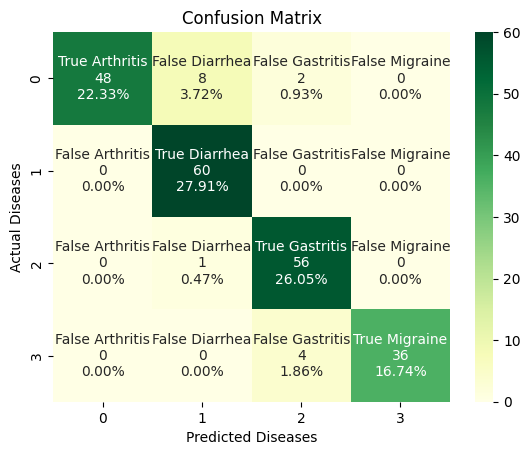

In [ ]:
# Generate the confusion matrix for the model

conf_mat = confusion_matrix(y_test, y_predict,labels=model.classes_)

group_names = ['True Arthritis','False Diarrhea','False Gastritis','False Migraine',
               'False Arthritis','True Diarrhea','False Gastritis','False Migraine',
               'False Arthritis','False Diarrhea','True Gastritis','False Migraine',
               'False Arthritis','False Diarrhea','False Gastritis','True Migraine']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]


labels = np.asarray(labels).reshape(4,4)

ax = sn.heatmap(conf_mat, annot=labels,yticklabels=model.classes_,xticklabels=model.classes_, fmt='', cmap='YlGn')
ax.set(
                title='Confusion Matrix',
                xlabel='Predicted Diseases',
                ylabel='Actual Diseases')
ax.plot

In [ ]:
# Extract class-wise accuracy
for i, class_label in enumerate(encoder.classes_):
    true_positive = conf_mat[i, i]
    false_positive = conf_mat[:, i].sum() - true_positive
    false_negative = conf_mat[i, :].sum() - true_positive
    true_negative = conf_mat.sum() - (true_positive + false_positive + false_negative)
    class_accuracy = (true_positive + true_negative) / conf_mat.sum()
    print(f"Accuracy for {class_label}:", class_accuracy)

Accuracy for Arthritis: 0.9534883720930233
Accuracy for Diarrhea: 0.958139534883721
Accuracy for Gastritis: 0.9674418604651163
Accuracy for Migraine: 0.9813953488372092


In [ ]:
# Displaying the logistic regression equation
print("Logistic Regression Equation:")
equation = f"y = {model.theta_[0]}"
for i, coef in enumerate(model.coef_):
    equation += f" + ({coef} * X{i+1})"
print(equation)

Logistic Regression Equation:
y = -23.76213456045195 + (1.0803604903078579 * X1) + (0.9941158942456586 * X2) + (0.046753193048057 * X3) + (1.5918858976729036 * X4) + (2.7610124134384195 * X5) + (-3.9306339712806766 * X6) + (-2.1449019755401464 * X7) + (-2.722026049317084 * X8) + (-6.995348364838043 * X9) + (0.04007006317878446 * X10) + (0.6112129204751116 * X11) + (0.47671938200919417 * X12) + (-3.468346807818137 * X13) + (0.058793959104063556 * X14) + (-0.2293296860401084 * X15) + (0.026501266078253278 * X16) + (-0.31526867692841093 * X17) + (0.09258426810421454 * X18) + (-0.2436699135122229 * X19) + (-0.14167089499926167 * X20) + (-0.1827341811053384 * X21) + (-0.39177714924543783 * X22) + (-0.14694638025362708 * X23) + (1.4453142556011727 * X24) + (1.1578759245515564 * X25) + (1.3689110608093955 * X26) + (0.8058359168442775 * X27) + (1.268799830391538 * X28) + (0.9607278699532406 * X29) + (0.990472853031455 * X30) + (0.8580928657213482 * X31) + (-6.790179302788712 * X32)


In [ ]:
 # For building a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
# For evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

model_1 = DecisionTreeClassifier()

model_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Use the trained model to make predictions on the test data using the 'predict()' method
y_predict = model_1.predict(X_test)

print("actual target :", y_test)
print("predicted target :", y_predict)

actual target : [2 0 1 1 2 1 1 2 0 2 2 3 2 3 0 1 3 1 0 2 0 0 0 1 1 1 0 3 0 2 0 2 2 0 0 2 2
 0 1 2 2 3 3 0 0 0 3 0 1 3 3 1 0 1 3 3 0 0 3 1 1 3 0 3 2 3 2 2 3 2 2 0 2 2
 2 1 0 0 2 3 2 0 1 1 0 0 0 0 2 2 0 1 0 3 2 3 1 1 1 0 3 3 1 0 0 2 0 1 1 1 0
 2 1 2 2 3 2 3 0 0 0 3 1 0 1 1 1 1 3 1 1 2 2 1 3 1 3 1 3 3 1 2 3 0 3 2 0 2
 2 1 1 1 1 0 3 1 2 1 2 2 1 2 0 2 0 1 2 3 3 0 0 1 1 2 1 2 1 2 0 2 1 1 1 3 0
 2 2 1 1 3 0 0 2 2 1 1 2 0 0 1 3 1 2 3 2 2 0 2 3 0 0 0 1 0 3]
predicted target : [2 0 1 1 2 1 1 2 0 2 2 3 2 3 0 1 3 1 0 2 0 0 0 1 1 1 0 3 0 2 0 2 2 0 0 1 2
 0 1 2 2 3 3 0 0 0 3 0 1 3 3 1 0 1 3 3 0 0 3 1 1 3 0 3 2 3 2 2 3 2 2 0 2 2
 2 1 0 0 2 3 2 0 1 1 0 0 0 0 2 2 0 1 0 3 2 3 1 1 1 0 3 3 1 0 0 2 0 1 1 1 0
 2 1 2 2 3 2 3 0 0 0 3 1 0 1 1 1 1 3 1 1 2 2 1 3 1 3 1 3 3 1 2 3 0 3 2 0 2
 2 1 1 1 1 0 3 1 2 1 2 2 1 2 0 2 0 1 2 3 3 0 0 1 1 2 1 2 1 2 0 2 1 1 1 3 0
 2 2 1 1 3 0 0 2 2 1 1 2 0 0 1 3 1 2 3 2 2 0 2 3 0 0 0 1 0 3]


In [ ]:
# Calculate the accuracy score of the model on the test set using the 'accuracy_score()' function from Scikit-Learn
from sklearn import metrics
accuracy_1 = accuracy_score(y_test, y_predict)
print("Accuracy of Decision Tree : ", accuracy_1)
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_predict))

Accuracy of Decision Tree :  0.9953488372093023
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.98      1.00      0.99        60
           2       1.00      0.98      0.99        57
           3       1.00      1.00      1.00        40

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
feature_cols=['acidity', 'indigestion', 'headache', 'blurred_and_distorted_vision', 'excessive_hunger', 'muscle_weakness', 'stiff_neck', 'swelling_joints', 'movement_stiffness', 'depression', 'irritability', 'visual_disturbances','painful_walking', 'abdominal_pain', 'nausea', 'vomiting', 'blood_in_mucus', 'Fatigue', 'Fever', 'Dehydration', 'loss_of_appetite', 'cramping', 'blood_in_stool', 'gnawing', 'upper_abdomain_pain', 'fullness_feeling', 'hiccups', 'abdominal_bloating', 'heartburn', 'belching', 'burning_ache', 'type of dosha']#	prognosis]
#feature_cols=['acidity','indigestion','blurred_and_distorted_vision','excessive_hunger','muscle_weakness','stiff_neck','swelling_joints','depression','abdominal_pain','vomiting','blood_in_mucus','fatigue','loss_of_appetite','heartburn','type of dosha']#	prognosis]

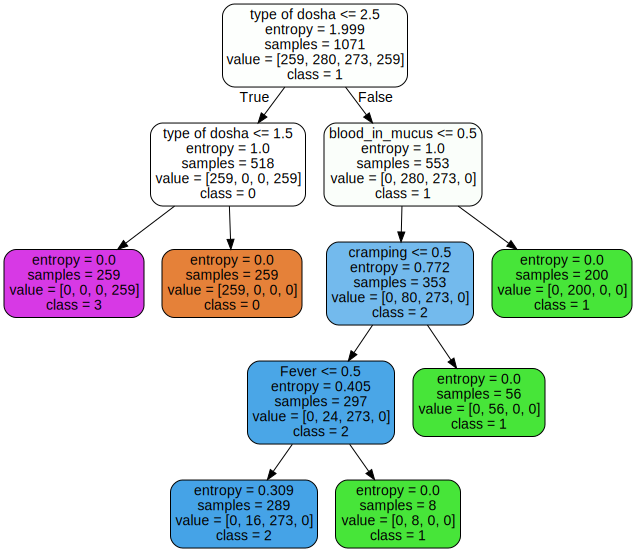

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

# Load your dataset
# Assuming you have already loaded and preprocessed your dataset
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree_clf.fit(X, y)

# Plot the decision tree graph
export_graphviz(
    tree_clf,
    out_file="custom_tree.dot",
    feature_names=X.columns,
    class_names=[str(class_label) for class_label in range(0, 4)],  # Adjust the class names according to your dataset
    rounded=True,
    filled=True
)

# Display the decision tree
with open("custom_tree.dot") as f:
    dot_graph = f.read()

Source(dot_graph)

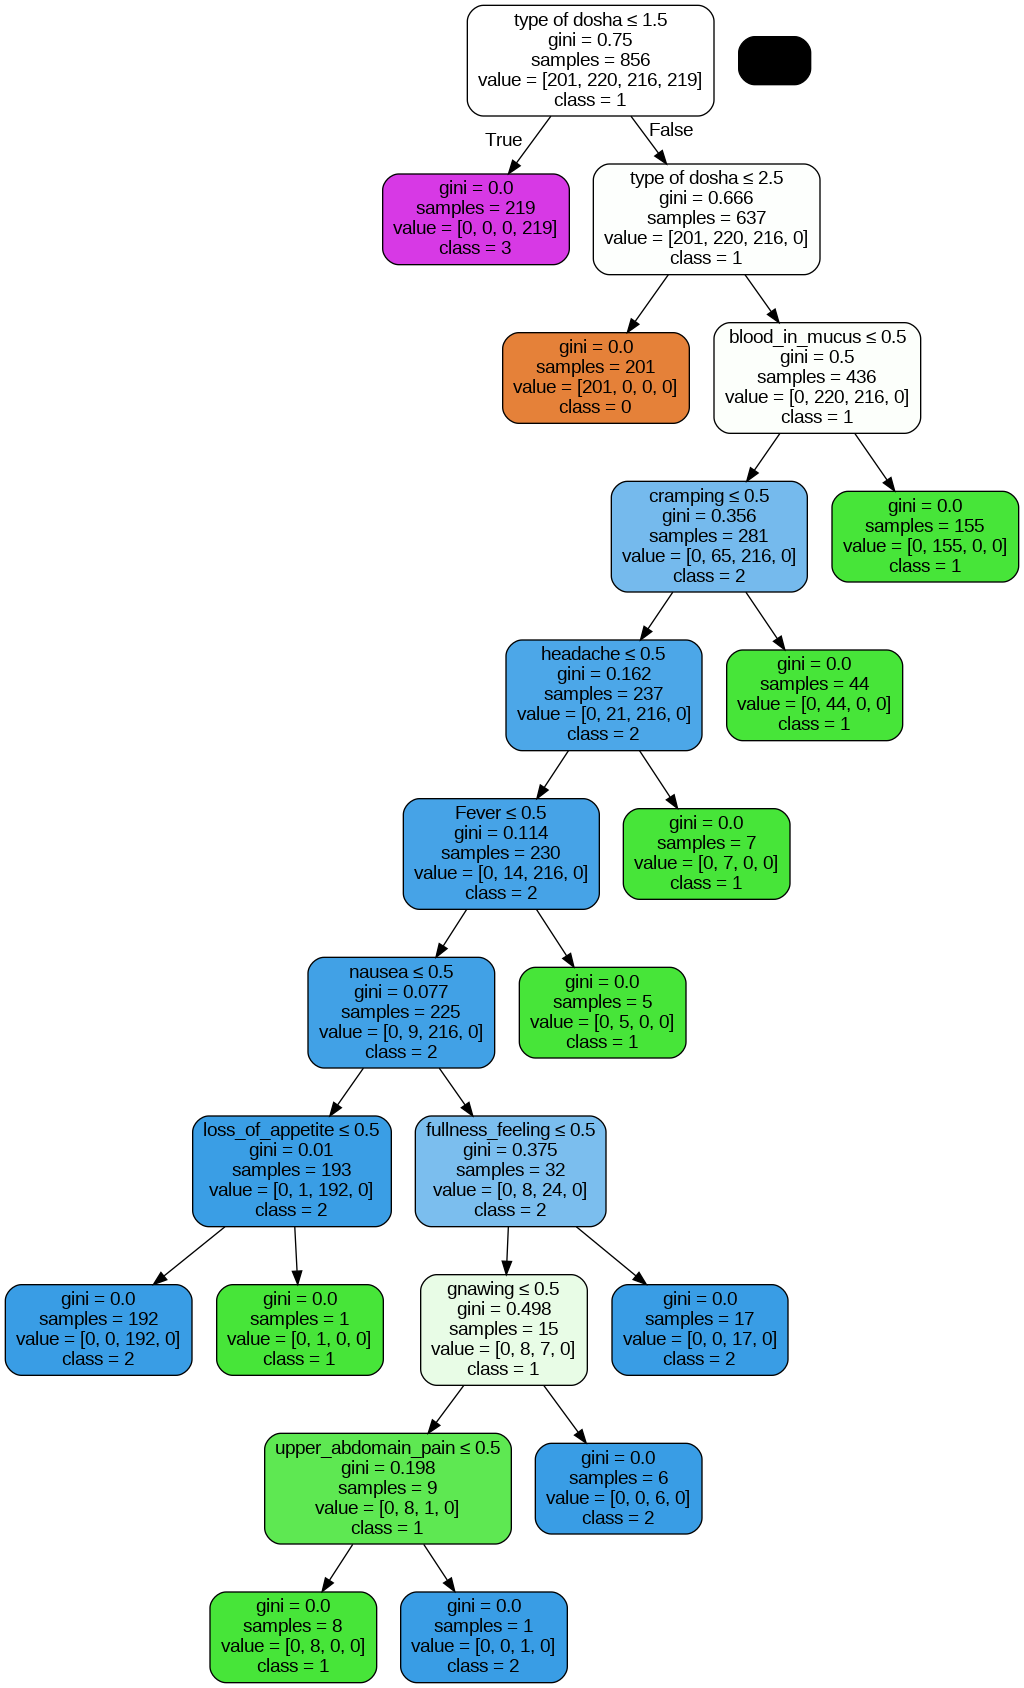

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model_1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.986046511627907


<bound method Axes.plot of <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Diseases', ylabel='Actual Diseases'>>

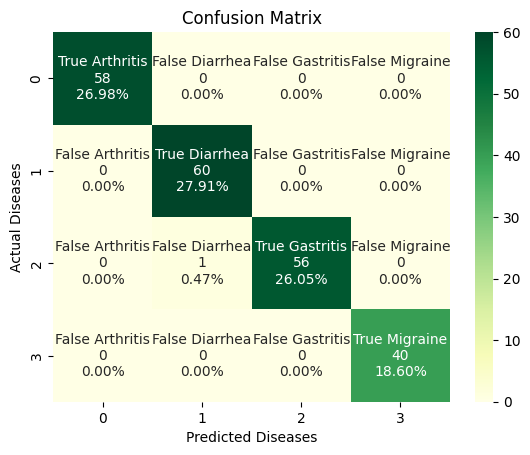

In [ ]:
# Generate the confusion matrix for the model

conf_mat = confusion_matrix(y_test, y_predict,labels=model_1.classes_)

group_names = ['True Arthritis','False Diarrhea','False Gastritis','False Migraine',
               'False Arthritis','True Diarrhea','False Gastritis','False Migraine',
               'False Arthritis','False Diarrhea','True Gastritis','False Migraine',
               'False Arthritis','False Diarrhea','False Gastritis','True Migraine']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]


labels = np.asarray(labels).reshape(4,4)

ax = sn.heatmap(conf_mat, annot=labels,yticklabels=model_1.classes_,xticklabels=model_1.classes_, fmt='', cmap='YlGn')
ax.set(
                title='Confusion Matrix',
                xlabel='Predicted Diseases',
                ylabel='Actual Diseases')
ax.plot

In [ ]:
# Extract class-wise accuracy
for i, class_label in enumerate(encoder.classes_):
    true_positive = conf_mat[i, i]
    false_positive = conf_mat[:, i].sum() - true_positive
    false_negative = conf_mat[i, :].sum() - true_positive
    true_negative = conf_mat.sum() - (true_positive + false_positive + false_negative)
    class_accuracy = (true_positive + true_negative) / conf_mat.sum()
    print(f"Accuracy for {class_label}:", class_accuracy)

Accuracy for Arthritis: 1.0
Accuracy for Diarrhea: 0.9953488372093023
Accuracy for Gastritis: 0.9953488372093023
Accuracy for Migraine: 1.0


In [ ]:
from sklearn import neighbors
model_3 = neighbors.KNeighborsClassifier(n_neighbors=5)
model_3.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Use the trained model to make predictions on the test data using the 'predict()' method
y_predict = model_3.predict(X_test)

print("actual target :", y_test)
print("predicted target :", y_predict)

actual target : [2 0 1 1 2 1 1 2 0 2 2 3 2 3 0 1 3 1 0 2 0 0 0 1 1 1 0 3 0 2 0 2 2 0 0 2 2
 0 1 2 2 3 3 0 0 0 3 0 1 3 3 1 0 1 3 3 0 0 3 1 1 3 0 3 2 3 2 2 3 2 2 0 2 2
 2 1 0 0 2 3 2 0 1 1 0 0 0 0 2 2 0 1 0 3 2 3 1 1 1 0 3 3 1 0 0 2 0 1 1 1 0
 2 1 2 2 3 2 3 0 0 0 3 1 0 1 1 1 1 3 1 1 2 2 1 3 1 3 1 3 3 1 2 3 0 3 2 0 2
 2 1 1 1 1 0 3 1 2 1 2 2 1 2 0 2 0 1 2 3 3 0 0 1 1 2 1 2 1 2 0 2 1 1 1 3 0
 2 2 1 1 3 0 0 2 2 1 1 2 0 0 1 3 1 2 3 2 2 0 2 3 0 0 0 1 0 3]
predicted target : [2 0 1 1 2 1 1 2 0 2 2 3 2 3 0 1 3 1 0 2 0 0 0 1 1 1 0 3 0 2 0 2 2 3 0 1 2
 3 1 2 2 3 3 0 0 0 3 0 1 3 3 1 0 1 3 3 0 0 3 1 1 3 0 3 2 3 2 2 3 2 2 0 2 2
 2 1 0 0 2 3 2 3 1 1 0 0 0 0 2 2 0 1 0 3 2 3 1 1 1 0 3 3 1 0 0 2 0 1 1 1 0
 2 1 2 2 3 2 3 0 0 0 3 1 0 1 1 1 1 3 1 1 2 2 1 3 1 3 1 3 3 1 2 3 0 3 2 0 2
 2 1 1 1 1 0 3 1 2 1 2 2 1 2 0 2 0 1 2 3 3 0 0 1 1 2 1 2 1 2 0 2 1 1 1 3 0
 2 2 1 1 3 0 0 2 2 1 1 2 0 0 1 3 1 2 3 2 2 0 2 3 0 0 0 1 0 3]


In [ ]:
# Calculate the accuracy score of the model on the test set using the 'accuracy_score()' function from Scikit-Learn
from sklearn import metrics
accuracy_3 = accuracy_score(y_test, y_predict)
print("Accuracy of Knn : ", accuracy_3)
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_predict))

Accuracy of Knn :  0.9813953488372092
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.98      1.00      0.99        60
           2       1.00      0.98      0.99        57
           3       0.93      1.00      0.96        40

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215



<bound method Axes.plot of <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Diseases', ylabel='Actual Diseases'>>

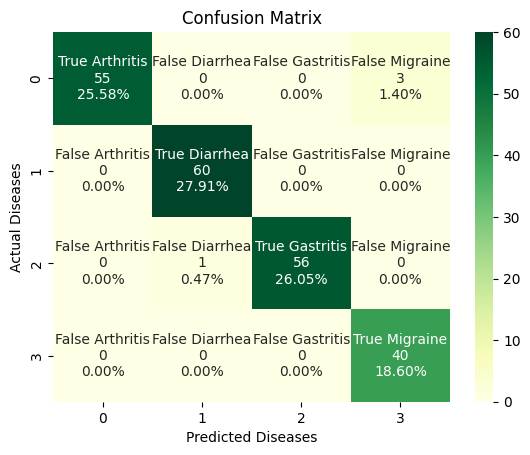

In [ ]:
# Generate the confusion matrix for the model

conf_mat = confusion_matrix(y_test, y_predict,labels=model_3.classes_)

group_names = ['True Arthritis','False Diarrhea','False Gastritis','False Migraine',
               'False Arthritis','True Diarrhea','False Gastritis','False Migraine',
               'False Arthritis','False Diarrhea','True Gastritis','False Migraine',
               'False Arthritis','False Diarrhea','False Gastritis','True Migraine']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]


labels = np.asarray(labels).reshape(4,4)

ax = sn.heatmap(conf_mat, annot=labels,yticklabels=model_3.classes_,xticklabels=model_3.classes_, fmt='', cmap='YlGn')
ax.set(
                title='Confusion Matrix',
                xlabel='Predicted Diseases',
                ylabel='Actual Diseases')
ax.plot

In [ ]:
# Extract class-wise accuracy
for i, class_label in enumerate(encoder.classes_):
    true_positive = conf_mat[i, i]
    false_positive = conf_mat[:, i].sum() - true_positive
    false_negative = conf_mat[i, :].sum() - true_positive
    true_negative = conf_mat.sum() - (true_positive + false_positive + false_negative)
    class_accuracy = (true_positive + true_negative) / conf_mat.sum()
    print(f"Accuracy for {class_label}:", class_accuracy)

Accuracy for Arthritis: 0.986046511627907
Accuracy for Diarrhea: 0.9953488372093023
Accuracy for Gastritis: 0.9953488372093023
Accuracy for Migraine: 0.986046511627907


In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Train an XGBoost classifier with the encoded labels
model_4 = xgb.XGBClassifier()
model_4.fit(X_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Use the trained model to make predictions on the test data using the 'predict()' method
y_predict = model_4.predict(X_test)

print("actual target :", y_test)
print("predicted target :", y_predict)

actual target : [2 0 1 1 2 1 1 2 0 2 2 3 2 3 0 1 3 1 0 2 0 0 0 1 1 1 0 3 0 2 0 2 2 0 0 2 2
 0 1 2 2 3 3 0 0 0 3 0 1 3 3 1 0 1 3 3 0 0 3 1 1 3 0 3 2 3 2 2 3 2 2 0 2 2
 2 1 0 0 2 3 2 0 1 1 0 0 0 0 2 2 0 1 0 3 2 3 1 1 1 0 3 3 1 0 0 2 0 1 1 1 0
 2 1 2 2 3 2 3 0 0 0 3 1 0 1 1 1 1 3 1 1 2 2 1 3 1 3 1 3 3 1 2 3 0 3 2 0 2
 2 1 1 1 1 0 3 1 2 1 2 2 1 2 0 2 0 1 2 3 3 0 0 1 1 2 1 2 1 2 0 2 1 1 1 3 0
 2 2 1 1 3 0 0 2 2 1 1 2 0 0 1 3 1 2 3 2 2 0 2 3 0 0 0 1 0 3]
predicted target : [2 0 1 1 2 1 1 2 0 2 2 3 2 3 0 1 3 1 0 2 0 0 0 1 1 1 0 3 0 2 0 2 2 0 0 1 2
 0 1 2 2 3 3 0 0 0 3 0 1 3 3 1 0 1 3 3 0 0 3 1 1 3 0 3 2 3 2 2 3 2 2 0 2 2
 2 1 0 0 2 3 2 0 1 1 0 0 0 0 2 2 0 1 0 3 2 3 1 1 1 0 3 3 1 0 0 2 0 1 1 1 0
 2 1 2 2 3 2 3 0 0 0 3 1 0 1 1 1 1 3 1 1 2 2 1 3 1 3 1 3 3 1 2 3 0 3 2 0 2
 2 1 1 1 1 0 3 1 2 1 2 2 1 2 0 2 0 1 2 3 3 0 0 1 1 2 1 2 1 2 0 2 1 1 1 3 0
 2 2 1 1 3 0 0 2 2 1 1 2 0 0 1 3 1 2 3 2 2 0 2 3 0 0 0 1 0 3]


In [ ]:
# Calculate the accuracy score of the model on the test set using the 'accuracy_score()' function from Scikit-Learn
from sklearn import metrics
accuracy_4 = accuracy_score(y_test, y_predict)
print("Accuracy of Xgboost : ", accuracy_4)
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_predict))

Accuracy of Xgboost :  0.9953488372093023
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.98      1.00      0.99        60
           2       1.00      0.98      0.99        57
           3       1.00      1.00      1.00        40

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



<bound method Axes.plot of <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Diseases', ylabel='Actual Diseases'>>

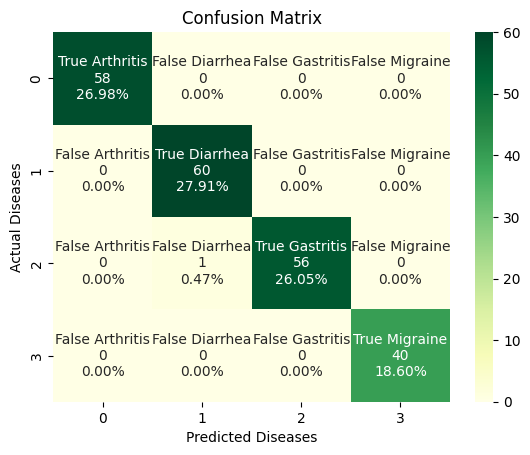

In [ ]:
# Generate the confusion matrix for the model

conf_mat = confusion_matrix(y_test, y_predict,labels=model_4.classes_)

group_names = ['True Arthritis','False Diarrhea','False Gastritis','False Migraine',
               'False Arthritis','True Diarrhea','False Gastritis','False Migraine',
               'False Arthritis','False Diarrhea','True Gastritis','False Migraine',
               'False Arthritis','False Diarrhea','False Gastritis','True Migraine']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]


labels = np.asarray(labels).reshape(4,4)

ax = sn.heatmap(conf_mat, annot=labels,yticklabels=model_4.classes_,xticklabels=model_4.classes_, fmt='', cmap='YlGn')
ax.set(
                title='Confusion Matrix',
                xlabel='Predicted Diseases',
                ylabel='Actual Diseases')
ax.plot

In [ ]:
# Extract class-wise accuracy
for i, class_label in enumerate(encoder.classes_):
    true_positive = conf_mat[i, i]
    false_positive = conf_mat[:, i].sum() - true_positive
    false_negative = conf_mat[i, :].sum() - true_positive
    true_negative = conf_mat.sum() - (true_positive + false_positive + false_negative)
    class_accuracy = (true_positive + true_negative) / conf_mat.sum()
    print(f"Accuracy for {class_label}:", class_accuracy)

Accuracy for Arthritis: 1.0
Accuracy for Diarrhea: 0.9953488372093023
Accuracy for Gastritis: 0.9953488372093023
Accuracy for Migraine: 1.0


In [ ]:
from sklearn.svm import SVC


# Train an SVM classifier
model_5 = SVC()
model_5.fit(X_train, y_train)

SVC()

In [ ]:
# Use the trained model to make predictions on the test data using the 'predict()' method
y_predict = model_5.predict(X_test)

print("actual target :", y_test)
print("predicted target :", y_predict)

actual target : [2 0 1 1 2 1 1 2 0 2 2 3 2 3 0 1 3 1 0 2 0 0 0 1 1 1 0 3 0 2 0 2 2 0 0 2 2
 0 1 2 2 3 3 0 0 0 3 0 1 3 3 1 0 1 3 3 0 0 3 1 1 3 0 3 2 3 2 2 3 2 2 0 2 2
 2 1 0 0 2 3 2 0 1 1 0 0 0 0 2 2 0 1 0 3 2 3 1 1 1 0 3 3 1 0 0 2 0 1 1 1 0
 2 1 2 2 3 2 3 0 0 0 3 1 0 1 1 1 1 3 1 1 2 2 1 3 1 3 1 3 3 1 2 3 0 3 2 0 2
 2 1 1 1 1 0 3 1 2 1 2 2 1 2 0 2 0 1 2 3 3 0 0 1 1 2 1 2 1 2 0 2 1 1 1 3 0
 2 2 1 1 3 0 0 2 2 1 1 2 0 0 1 3 1 2 3 2 2 0 2 3 0 0 0 1 0 3]
predicted target : [2 0 1 1 2 1 1 2 0 2 2 3 2 3 0 1 3 1 0 2 0 0 0 1 1 1 0 3 0 2 0 2 2 0 0 1 2
 0 1 2 2 3 3 0 0 0 3 0 1 3 3 1 0 1 3 3 0 0 3 1 1 3 0 3 2 3 2 2 3 2 2 0 2 2
 2 1 0 0 2 3 2 0 1 1 0 0 0 0 2 2 0 1 0 3 2 3 1 1 1 0 3 3 1 0 0 2 0 1 1 1 0
 2 1 2 2 3 2 3 0 0 0 3 1 0 1 1 1 1 3 1 1 2 2 1 3 1 3 1 3 3 1 2 3 0 3 2 0 2
 2 1 1 1 1 0 3 1 2 1 2 2 1 2 0 2 0 1 2 3 3 0 0 1 1 2 1 2 1 2 0 2 1 1 1 3 0
 2 2 1 1 3 0 0 2 2 1 1 2 0 0 1 3 1 2 3 2 2 0 2 3 0 0 0 1 0 3]


In [ ]:
# Calculate the accuracy score of the model on the test set using the 'accuracy_score()' function from Scikit-Learn
from sklearn import metrics
accuracy_5 = accuracy_score(y_test, y_predict)
print("Accuracy of Support vector machine : ", accuracy_5)
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_predict))

Accuracy of Support vector machine :  0.9953488372093023
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.98      1.00      0.99        60
           2       1.00      0.98      0.99        57
           3       1.00      1.00      1.00        40

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



<bound method Axes.plot of <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Diseases', ylabel='Actual Diseases'>>

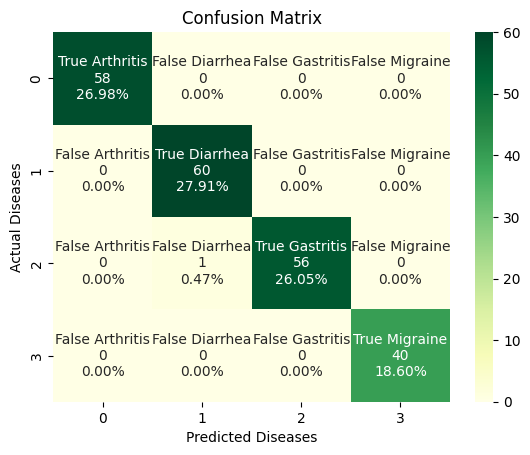

In [ ]:
# Generate the confusion matrix for the model

conf_mat = confusion_matrix(y_test, y_predict,labels=model_4.classes_)

group_names = ['True Arthritis','False Diarrhea','False Gastritis','False Migraine',
               'False Arthritis','True Diarrhea','False Gastritis','False Migraine',
               'False Arthritis','False Diarrhea','True Gastritis','False Migraine',
               'False Arthritis','False Diarrhea','False Gastritis','True Migraine']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]


labels = np.asarray(labels).reshape(4,4)

ax = sn.heatmap(conf_mat, annot=labels,yticklabels=model_4.classes_,xticklabels=model_4.classes_, fmt='', cmap='YlGn')
ax.set(
                title='Confusion Matrix',
                xlabel='Predicted Diseases',
                ylabel='Actual Diseases')
ax.plot

In [ ]:
# Extract class-wise accuracy
for i, class_label in enumerate(encoder.classes_):
    true_positive = conf_mat[i, i]
    false_positive = conf_mat[:, i].sum() - true_positive
    false_negative = conf_mat[i, :].sum() - true_positive
    true_negative = conf_mat.sum() - (true_positive + false_positive + false_negative)
    class_accuracy = (true_positive + true_negative) / conf_mat.sum()
    print(f"Accuracy for {class_label}:", class_accuracy)

Accuracy for Arthritis: 1.0
Accuracy for Diarrhea: 0.9953488372093023
Accuracy for Gastritis: 0.9953488372093023
Accuracy for Migraine: 1.0


In [ ]:
import numpy as np
import seaborn as sn
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset
#df = pd.read_csv(r'/content/Dataset.csv')
df = pd.read_csv(r'/content/Book1.csv')
# Replace strings in the 'type of dosha' column with numerical values
df['type of dosha'] = df['type of dosha'].replace({'Kapha': 1, "Vaatha": 2, "Pittha": 3})

# Encode the 'prognosis' column
encoder = LabelEncoder()
df['prognosis'] = encoder.fit_transform(df['prognosis'])

# Extract all rows and the first 31 columns as features 'X'
X = df.iloc[:, :31].values

# Extract all rows of the last two columns as target 'y'
y = df.iloc[:, -2:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier for each target feature separately
svm_classifier_1 = SVC()
svm_classifier_2 = SVC()

svm_classifier_1.fit(X_train, y_train[:, 0])
svm_classifier_2.fit(X_train, y_train[:, 1])

# Make predictions for each target feature separately
y_pred_1 = svm_classifier_1.predict(X_test)
y_pred_2 = svm_classifier_2.predict(X_test)

# Compute accuracy and precision for each target feature separately
accuracy_1 = accuracy_score(y_test[:, 0], y_pred_1)
accuracy_2 = accuracy_score(y_test[:, 1], y_pred_2)

precision_1 = precision_score(y_test[:, 0], y_pred_1, average='micro')
precision_2 = precision_score(y_test[:, 1], y_pred_2, average='micro')


# Classification report for each target feature
print("Classification Report for Target 1:")
print(classification_report(y_test[:, 0], y_pred_1))

print("Classification Report for Target 2:")
print(classification_report(y_test[:, 1], y_pred_2))



Classification Report for Target 1:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        59
           3       1.00      1.00      1.00       109

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215

Classification Report for Target 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        47

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



In [ ]:
#input_data=[[ 1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	1,	0,0]] #270sample
#input_data=[[0,	0,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,0]]#578
input_data=[[0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0, 0, 0]]
prediction = svm_classifier_1.predict(input_data)
print(prediction)

if prediction[0] == 0:
    print('Vaatha')
    print('Arthritis')
elif prediction[0] == 1:
    print('Pittha')
    print('Diarrhea')
elif prediction[0] == 2:
    print('Kapha')
    print('Migraine')
elif prediction[0] == 3:
    print('Pittha')
    print('Gastritis')
else:
    print('Unknown class')

[2]
Kapha
Migraine


In [ ]:
#input_data=[[ 1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	1,	2]] #270sample
#input_data=[[0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	3]]#578
input_data=[[0,	1,	1,	1,	1,	1,	1,	0,	0,	1,	0,	0,	1]]
prediction = svm_classifier_1.predict(input_data)
print(prediction)

if prediction[0] == 0:
    print('Vaatha')
    print('Arthritis')
elif prediction[0] == 1:
    print('Pittha')
    print('Diarrhea')
elif prediction[0] == 2:
    print('Kapha')
    print('Migraine')
elif prediction[0] == 3:
    print('Pittha')
    print('Gastritis')
else:
    print('Unknown class')

In [ ]:
#input_data=[[ 1,	0,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	1,	2]] #270sample
#input_data=[[0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	3]]#578
input_data=[[0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0, 3]]
prediction = model_5.predict(input_data)
print(prediction)

if prediction[0] == 0:
    print('Arthritis')
elif prediction[0] == 1:
    print('Diarrhea')
elif prediction[0] == 2:
    print('Migraine')
elif prediction[0] == 3:
    print('Gastritis')
else:
    print('Unknown class')
